In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings(action="ignore")

In [32]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [34]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [35]:
df.shape

(1599, 12)

In [36]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

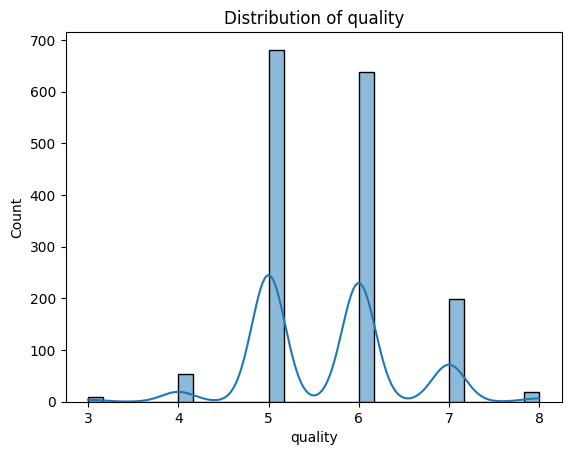

In [37]:
target_col = "quality"
sns.histplot(df[target_col],kde=True)
plt.title(f"Distribution of {target_col}")
plt.show()

In [38]:
cols = [col for col in df.columns]
cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

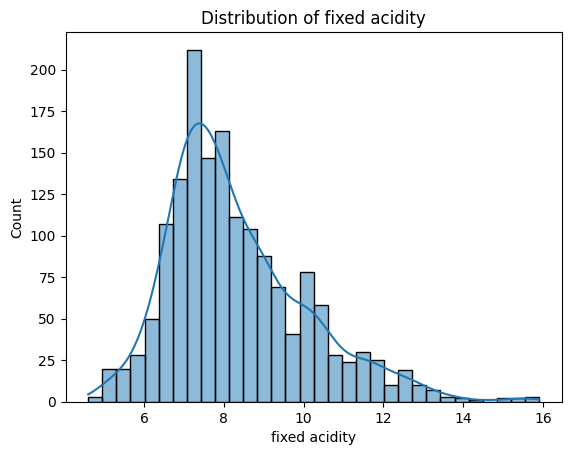

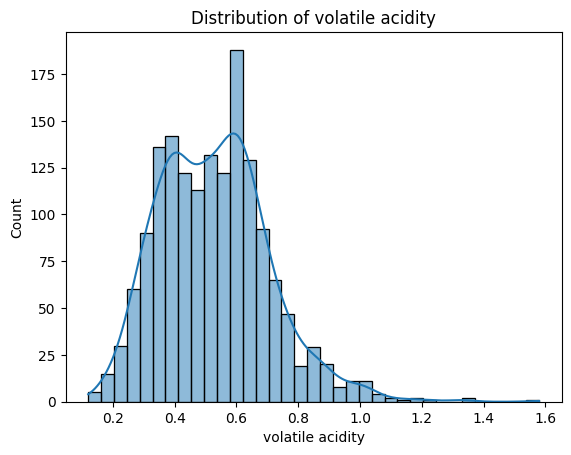

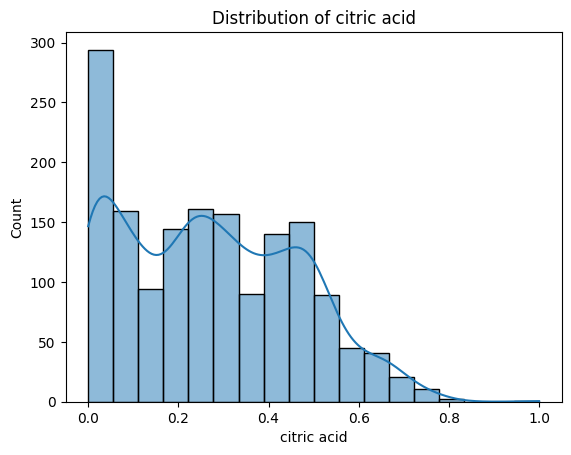

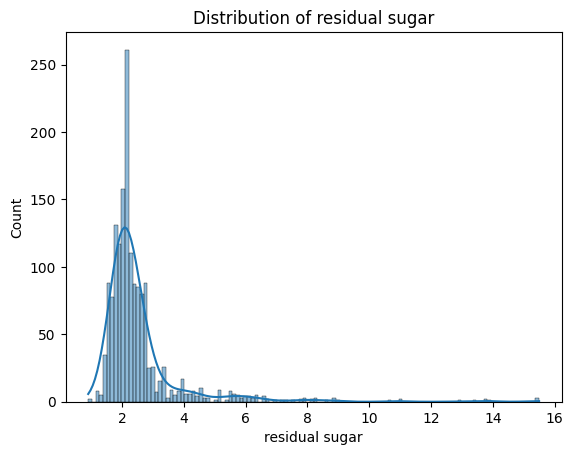

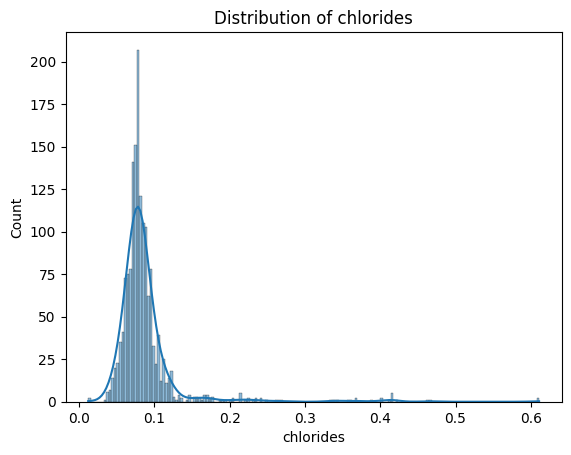

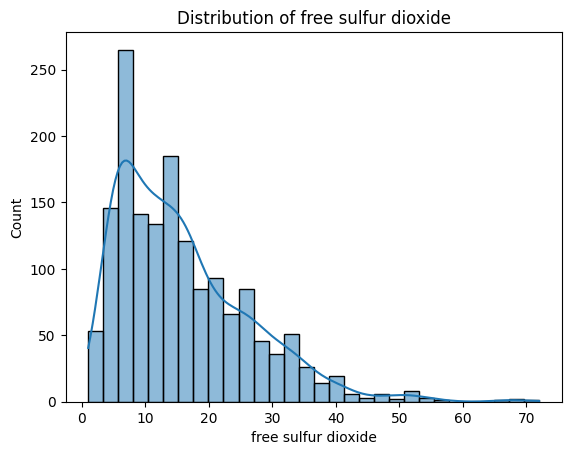

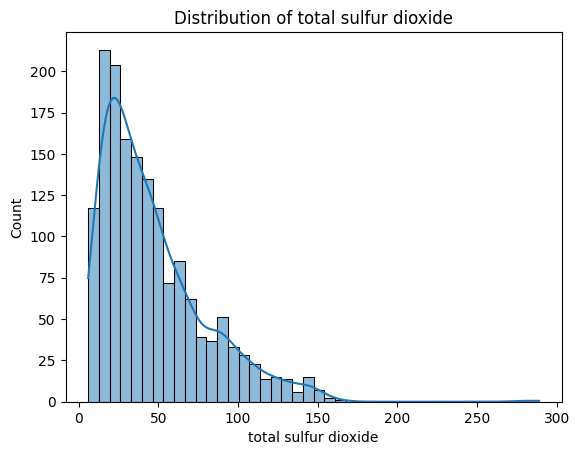

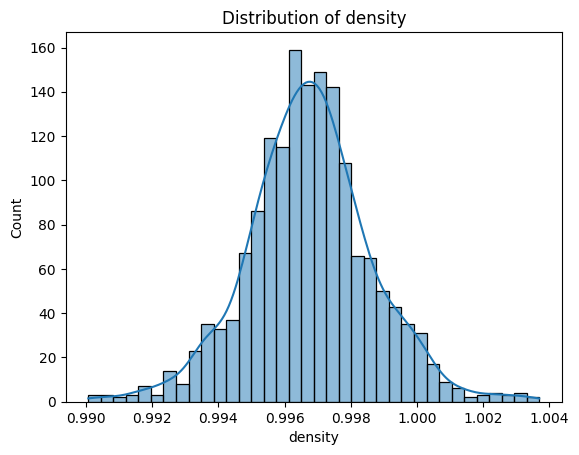

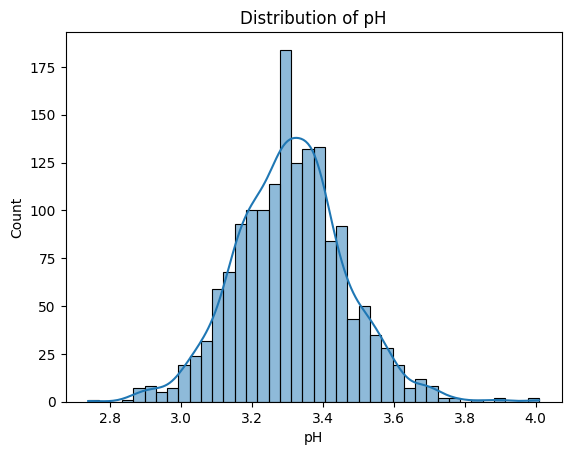

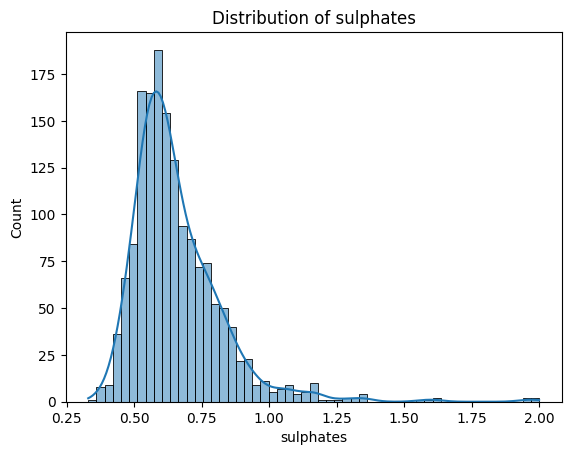

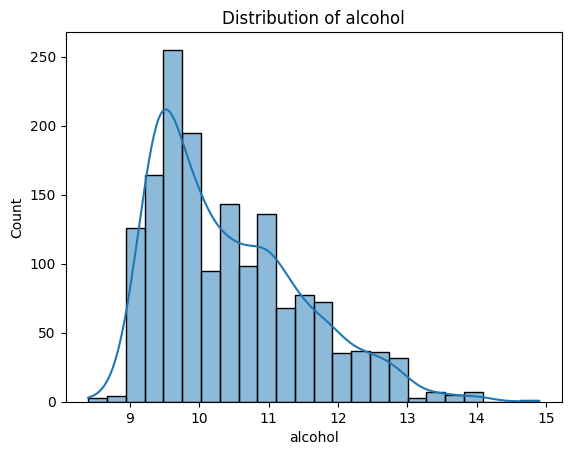

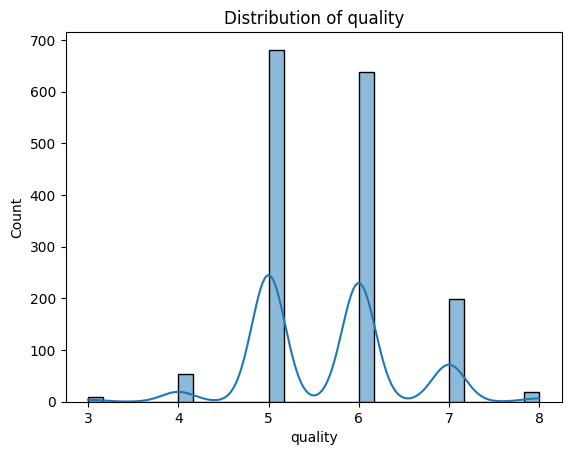

In [39]:
for col in cols:
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

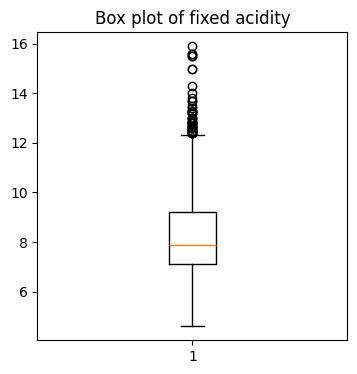

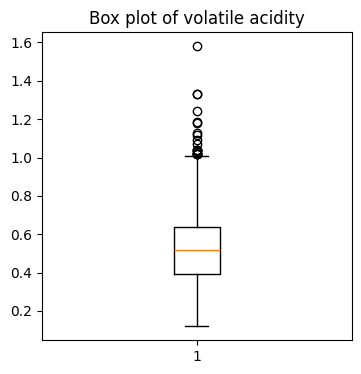

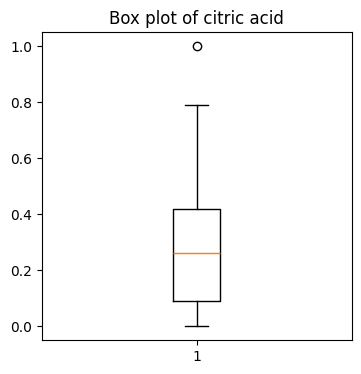

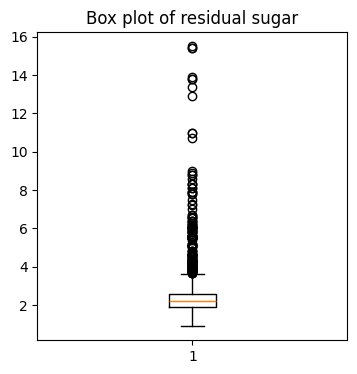

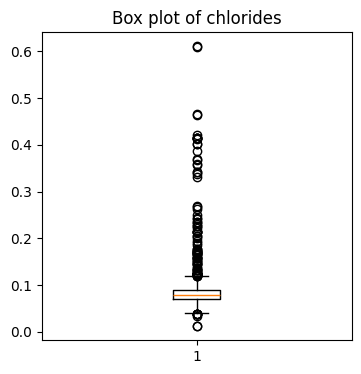

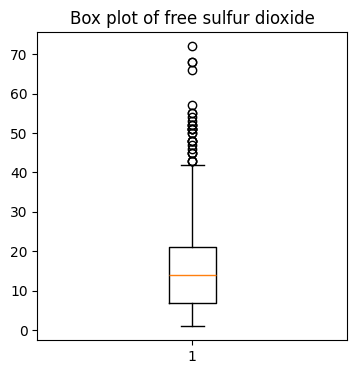

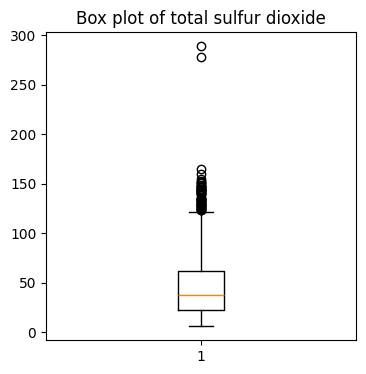

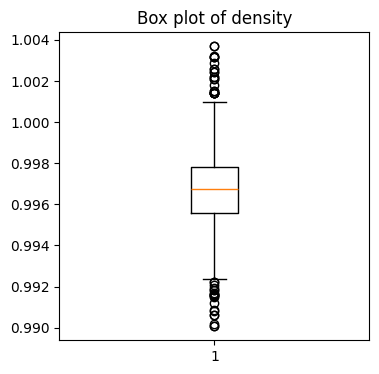

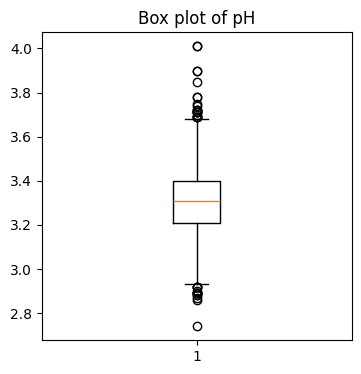

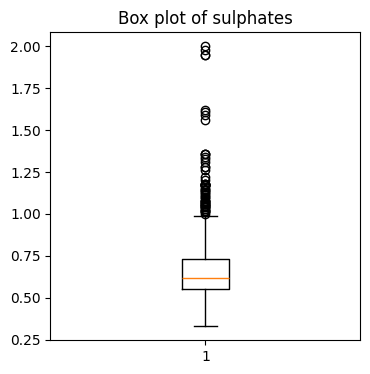

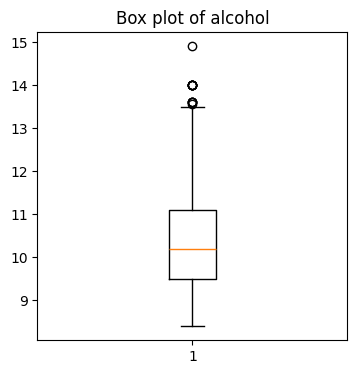

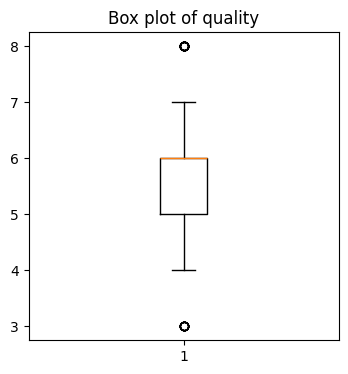

In [40]:
for col in cols:
    plt.figure(figsize=(4,4))
    plt.boxplot(df[col])
    plt.title(f"Box plot of {col}")
    plt.show()
    print()

In [41]:
df = df[df["fixed acidity"]<10.5]
df = df[df["volatile acidity"]<1.0]
df = df[df["citric acid"]<0.8]
df = df[df["residual sugar"]<3]
df = df[df["chlorides"]<0.10]
df = df[df["chlorides"]>0.05]
df = df[df["free sulfur dioxide"]<38]
df = df[df["total sulfur dioxide"]<109]
df = df[df["density"]<1.00]
df = df[df["density"]>0.993]
df = df[df["pH"]<3.65]
df = df[df["pH"]>3]
df = df[df["sulphates"]<0.85]
df = df[df["alcohol"]<12.5]
df = df[df["quality"]<7]
df = df[df["quality"]>4]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         714 non-null    float64
 1   volatile acidity      714 non-null    float64
 2   citric acid           714 non-null    float64
 3   residual sugar        714 non-null    float64
 4   chlorides             714 non-null    float64
 5   free sulfur dioxide   714 non-null    float64
 6   total sulfur dioxide  714 non-null    float64
 7   density               714 non-null    float64
 8   pH                    714 non-null    float64
 9   sulphates             714 non-null    float64
 10  alcohol               714 non-null    float64
 11  quality               714 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 72.5 KB


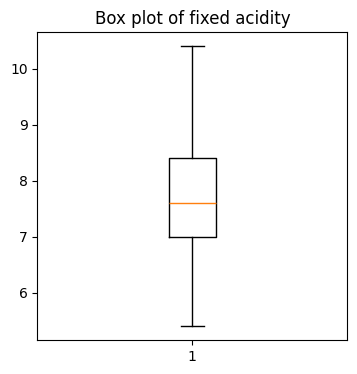

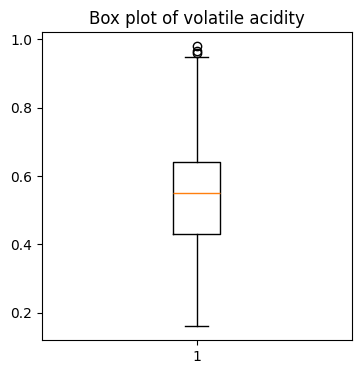

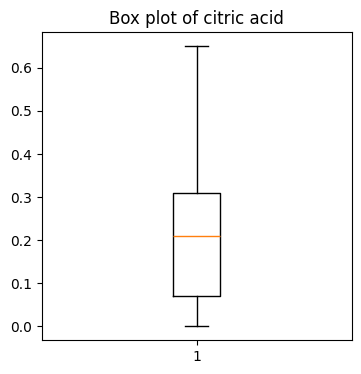

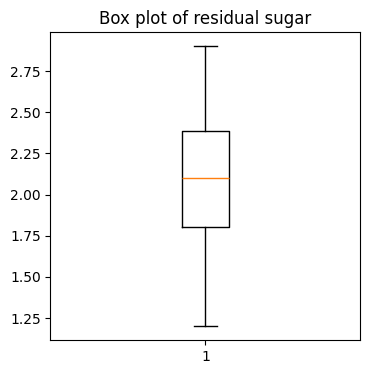

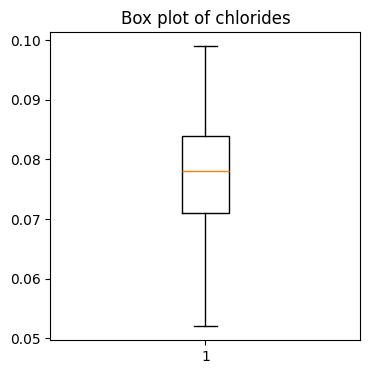

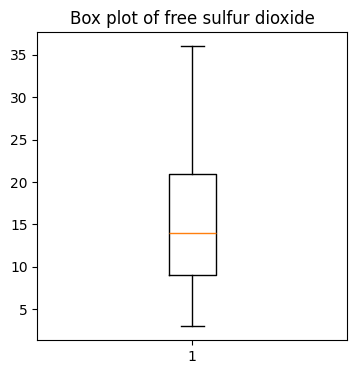

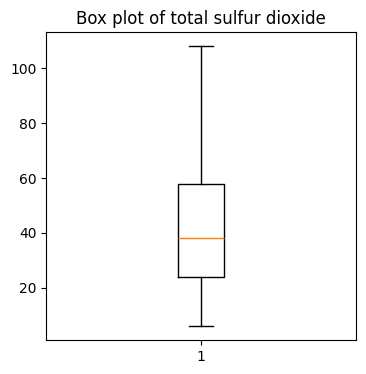

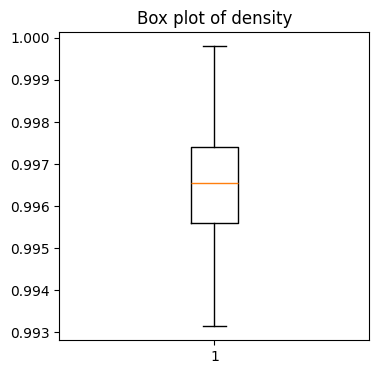

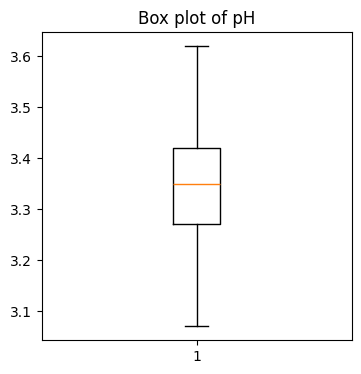

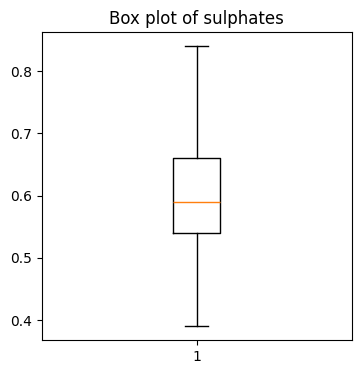

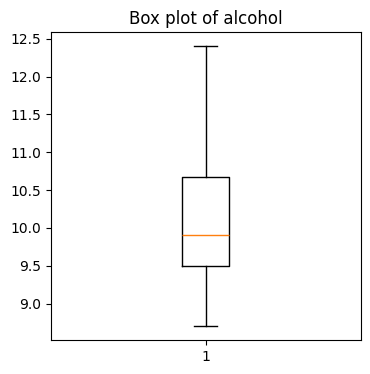

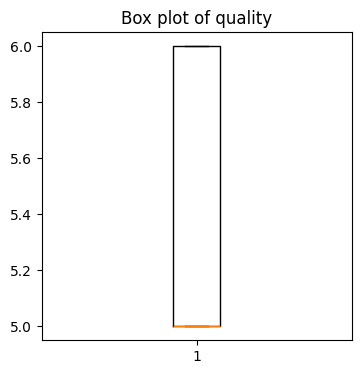

In [43]:
for col in cols:
    plt.figure(figsize=(4,4))
    plt.boxplot(df[col])
    plt.title(f"Box plot of {col}")
    plt.show()
    print()

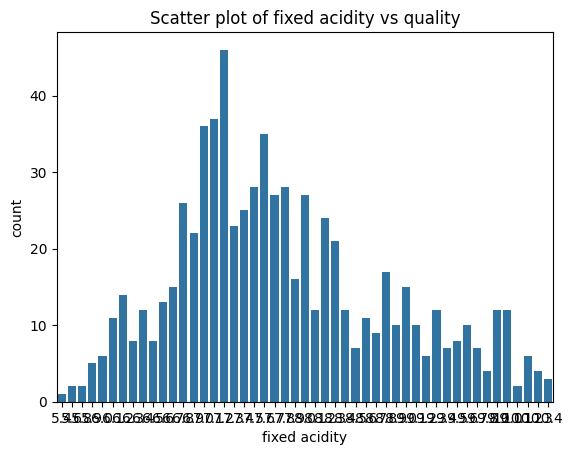

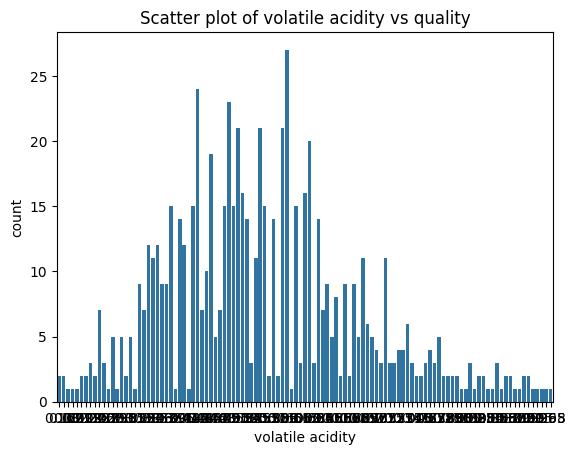

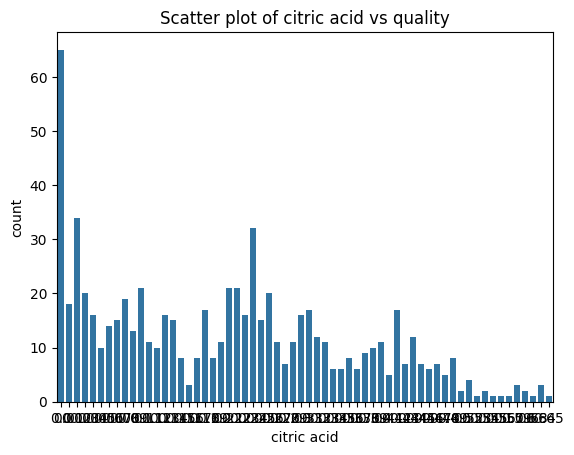

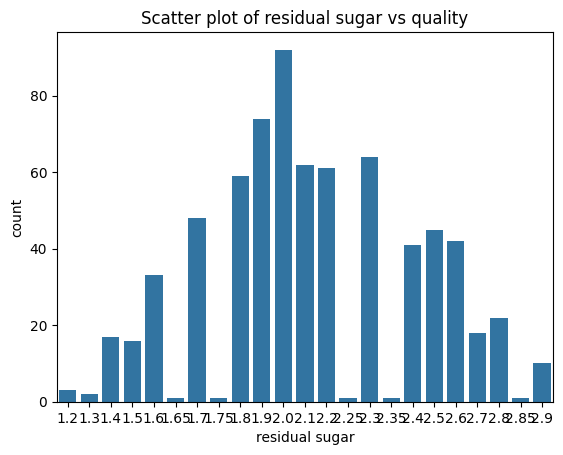

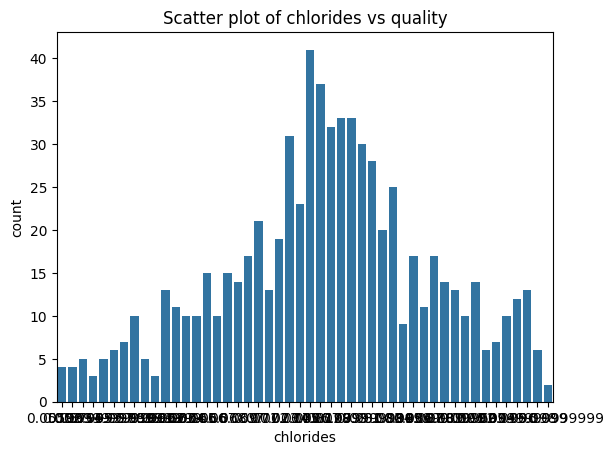

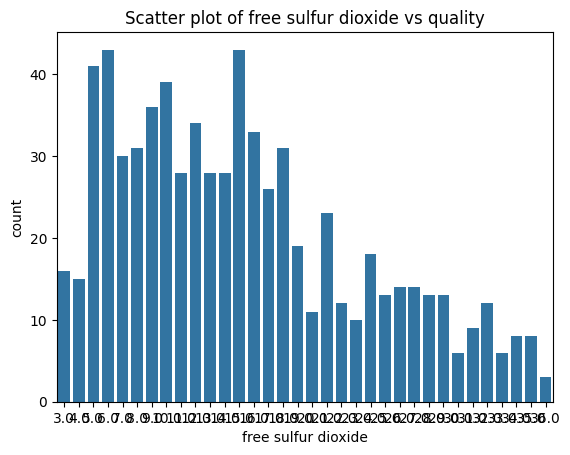

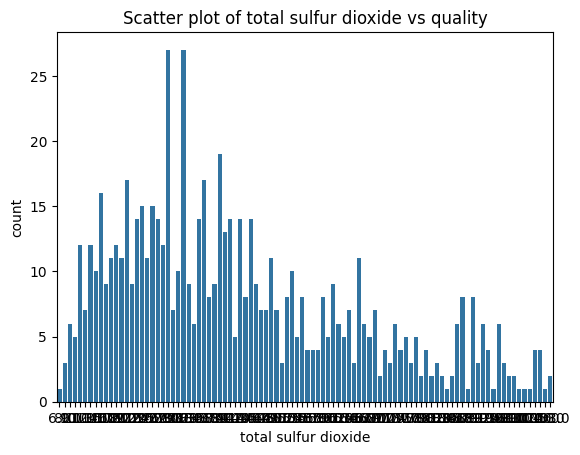

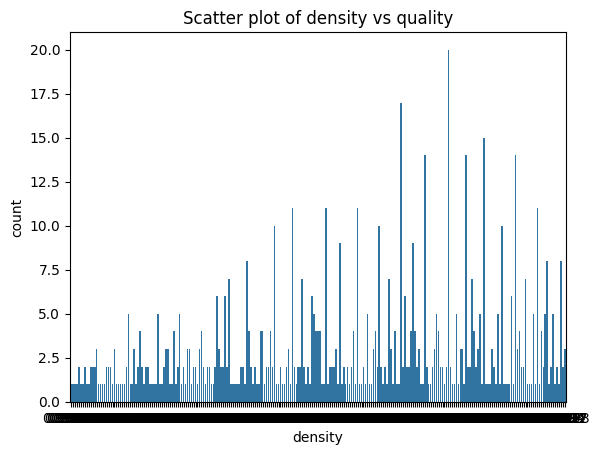

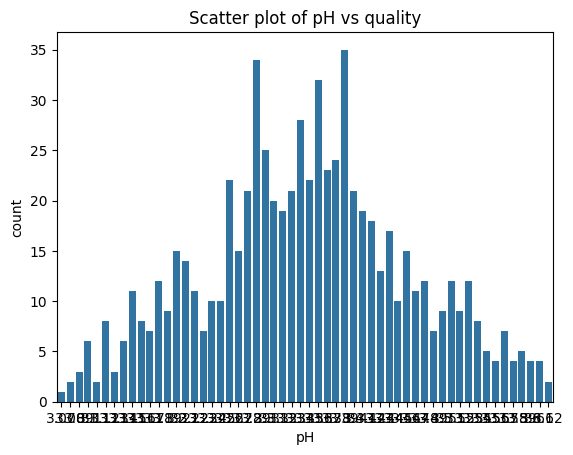

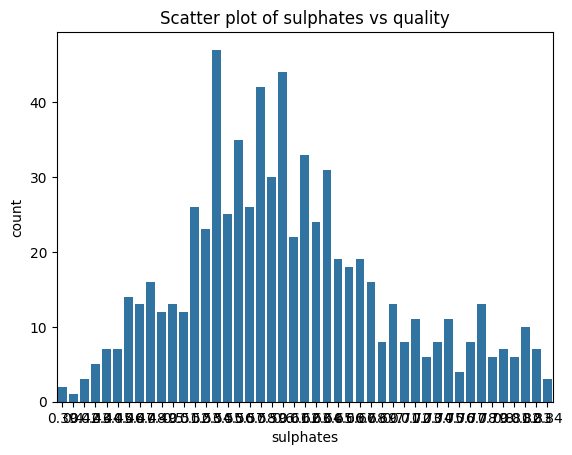

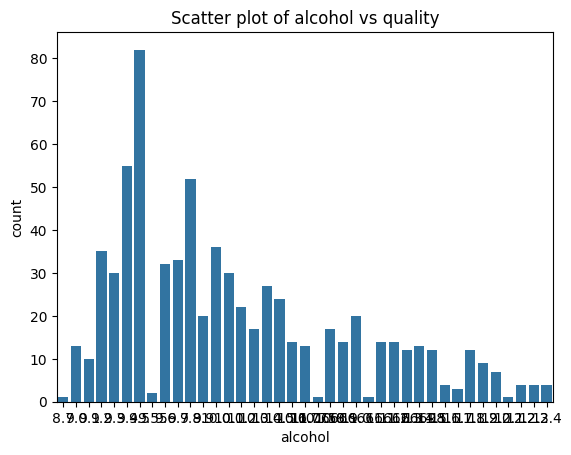

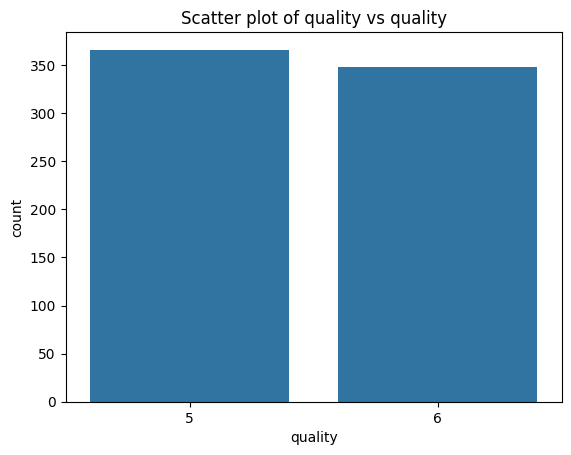

In [44]:
# Bivariate Analysis
for col in cols:
    sns.countplot(x=df[col])
    plt.title(f"Scatter plot of {col} vs {target_col}")
    plt.show()

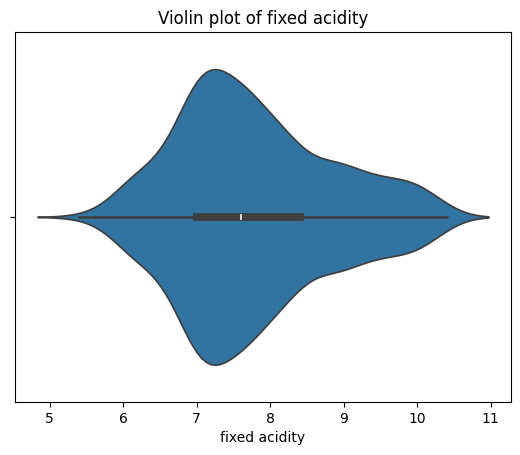

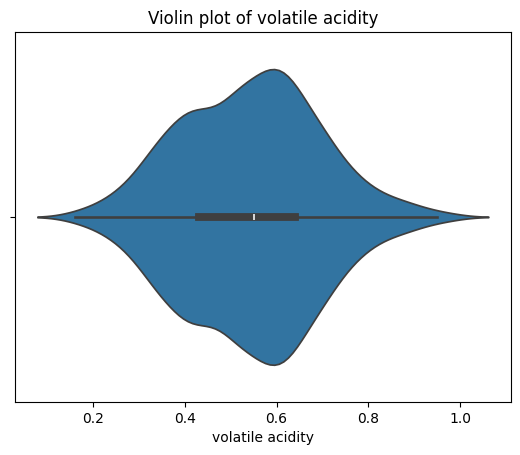

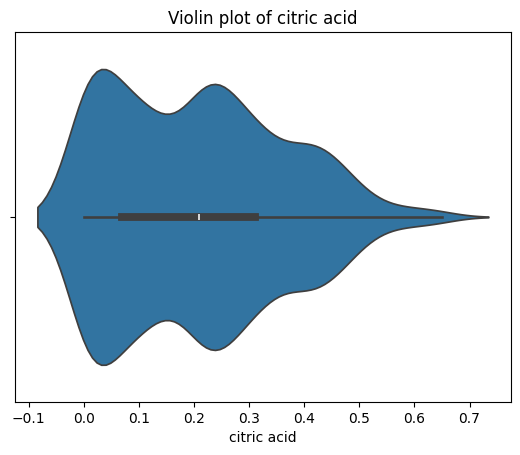

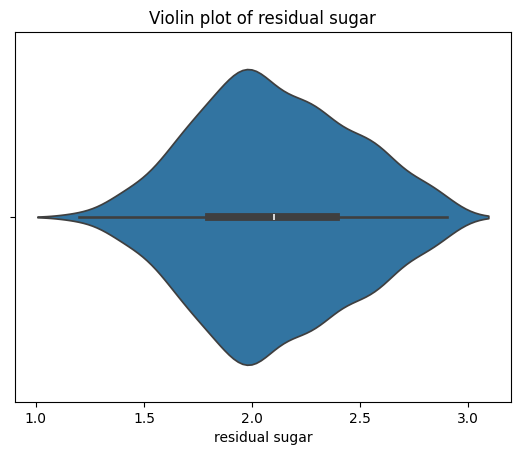

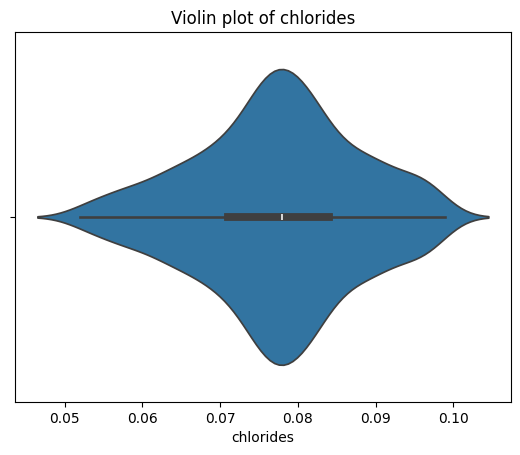

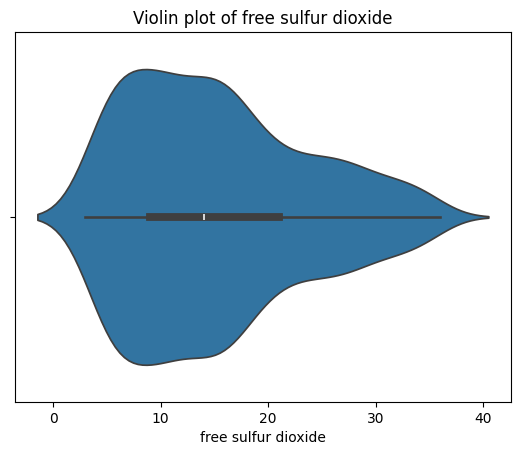

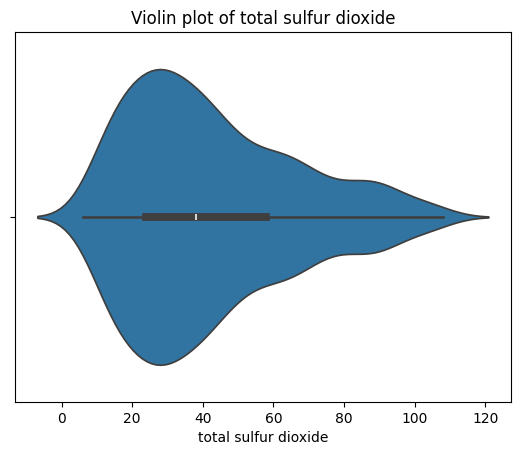

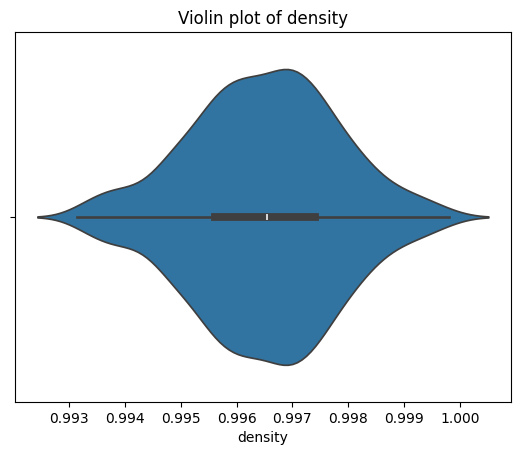

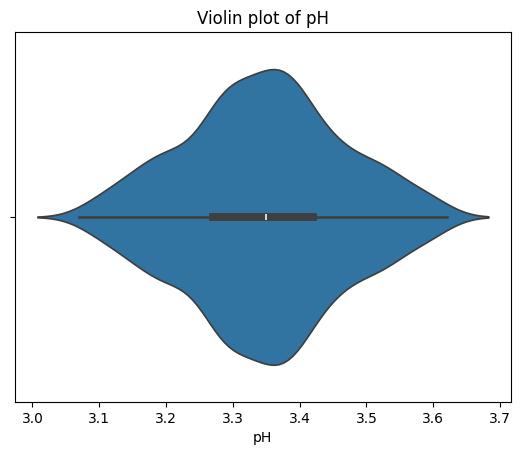

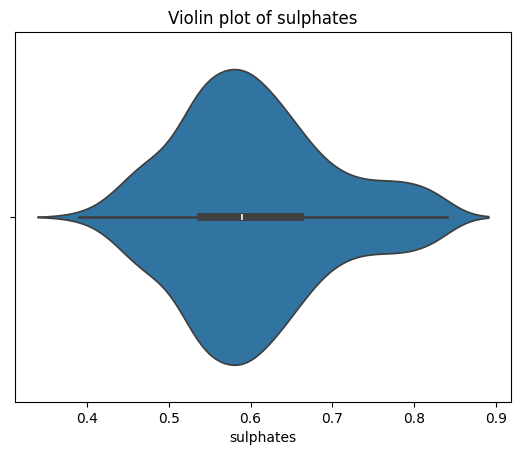

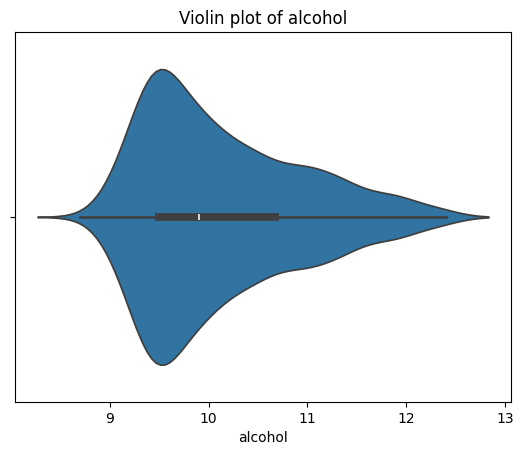

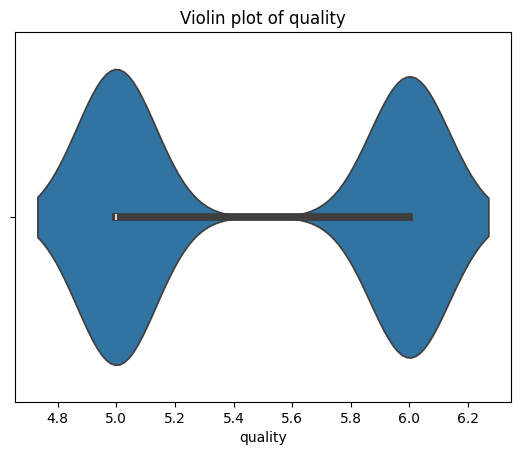

In [45]:
for col in cols:
    sns.violinplot(x=df[col])
    plt.title(f"Violin plot of {col}")
    plt.show()

<Axes: xlabel='quality', ylabel='count'>

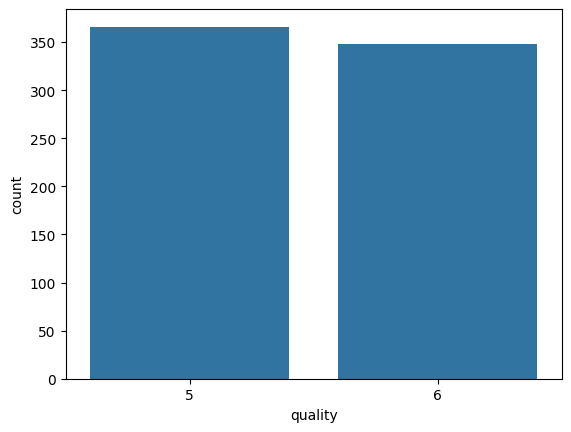

In [46]:
sns.countplot(x=df["quality"])

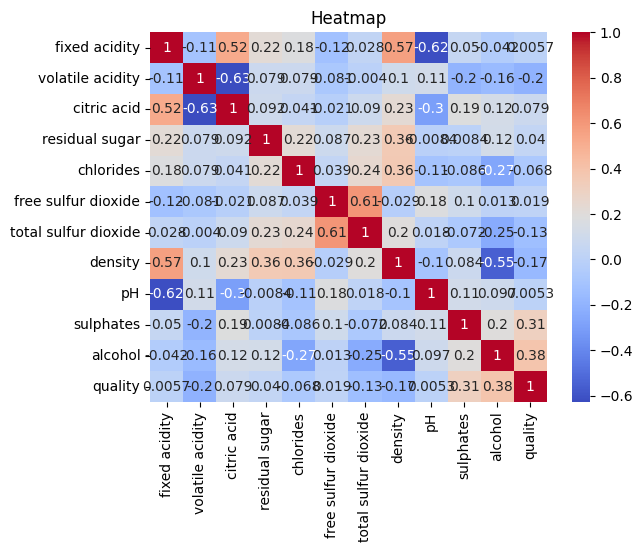

In [47]:
corr = df[cols].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Heatmap")
plt.show()

In [48]:
X=df.drop(columns=["quality"])
y=df["quality"]

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [51]:
# models= {
#     "LinearRegression" : LinearRegression(),
#     "DecisionTree" : DecisionTreeRegressor(),
#     "RandomForest" : RandomForestRegressor(),
#     "XGBoost": XGBRegressor()
# }

In [52]:
# param_grids = {
#     "LinearRegression": {},
#     "DecisionTree": {
#         "max_depth": [3,5,7,10],
#         "min_samples_split": [2,5,10],
#         "min_samples_leaf": [1,2,4],
#     },
#     "RandomForest": {
#         "n_estimators": [100,200],
#         "max_depth": [5,10,None],
#         "min_samples_split": [2,5],
#         "min_samples_leaf": [1,2],
#         "bootstrap": [True,False],
#     },
#     "XGBoost": {
#         "n_estimators":[100,200],
#         "learning_rate": [0.01,0.05,0.1],
#         "max_depth":[3,5,7],
#         "subsample": [0.8,1.0],
#     },
# }

In [53]:
# # Loop through models and perform GridSearchCV
# for name, model in models.items():
#     print(f"\n{name} Hyperparameter Tuning:")
#     # GridSearchCV for hyperparameter tuning
#     grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
#     grid_search.fit(X_train, y_train)
#     # Get the best model from GridSearchCV
#     best_model = grid_search.best_estimator_
#     # Predict and evaluate the best model
#     y_pred = best_model.predict(X_test)
#     # Print the metrics
#     print("Best Hyperparameters:", grid_search.best_params_)
#     print("MSE:", mean_squared_error(y_test, y_pred))
#     print("R2 Score:", r2_score(y_test, y_pred))
#     print()

In [56]:
# 14. Model Training and Hyperparameter Tuning for Classifier
cmodels = {
    "LogisticRegression": LogisticRegression(max_iter=500),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
}

In [57]:
# Define parameter grids for hyperparameter tuning
param_grids = {
    "LogisticRegression": {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    "DecisionTreeClassifier": {
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "RandomForestClassifier": {
        'n_estimators': [50, 100, 150],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    "XGBClassifier": {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    }
}

# Create a dictionary to store the best model for each algorithm
best_models = {}

In [59]:
# Loop through the models and parameter grids to perform GridSearchCV
for name, model in cmodels.items():
    print(f"Training {name}...")
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, n_jobs=-1, verbose=1)
    # Fit GridSearchCV to the data (assuming X_train and y_train are your training data)
    grid_search.fit(X_train, y_train)
    # Store the best model in the dictionary
    best_model = grid_search.best_estimator_
    # Print best parameters
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")
    y_pred = best_model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
# Now `best_models` contains the best models for each algorithm based on GridSearchCV

Training LogisticRegression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best hyperparameters for LogisticRegression: {'C': 1, 'solver': 'liblinear'}
Best score for LogisticRegression: 0.7092295957284516

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           5       0.64      0.69      0.66        74
           6       0.63      0.58      0.61        69

    accuracy                           0.64       143
   macro avg       0.64      0.63      0.63       143
weighted avg       0.64      0.64      0.64       143

Accuracy: 0.6363636363636364
Training DecisionTreeClassifier...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters for DecisionTreeClassifier: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score for DecisionTreeClassifier: 0.728466819221968

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

       

ValueError: 
All the 135 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/amlpractice/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/amlpractice/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/amlpractice/lib/python3.12/site-packages/xgboost/sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [5 6]


In [ ]:
# # Loop through models and perform GridSearchCV
# for name, model in models.items():
#     print(f"\n{name} Hyperparameter Tuning:")
#     # GridSearchCV for hyperparameter tuning
#     grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
#     grid_search.fit(X_train, y_train)
#     # Get the best model from GridSearchCV
#     best_model = grid_search.best_estimator_
#     # Predict and evaluate the best model
#     y_pred = best_model.predict(X_test)
#     # Print the metrics
#     print("Best Hyperparameters:", grid_search.best_params_)
#     print("MSE:", mean_squared_error(y_test, y_pred))
#     print("R2 Score:", r2_score(y_test, y_pred))
#     print()